# ML based price optimization for the quantities based on price elasticity


## Intorduction:
Pricing a product is a crucial aspect in any business. Alot of thought process is out into it. There are different strategies to price different kinds of products. There are products whose sales are quite sensitive to their prices and as such a small change in their price can lead to noticeable change in their sales.

"This project work aims on the prediction for the best price of the items based on available quantities to have maximum profit".

In this project price elasticity term is used to define relationship inbetween price and quantities. 

Price elasticity of demand or elasticity, is the degree to which the effective desire for something changes as its price changes. In general, people desire things less as those things become more expensive. However, for some products, the customer's desire could drop sharply even with a little price increase, and for other products, it could stay almost the same even with a big price increase. Economists use the term elasticity to denote this sensitivity to price increases. More precisely, price elasticity gives the percentage change in quantity demanded when there is a one percent increase in price, holding everything else constant.

## Defining price elasticity
Relationship Mathematically speaking, the price elasticity of demand is defined to be the percentage change in quantity demanded, q,divided by the percentage change in price, p. The formula for the price elasticity (ǫ) is: 
                                𝑒=%Δ𝑄/%Δ𝑃

## Collection of data

The project uses data availabe on internet for a Cafe 
There are three categories of data for the Cafe
 1. Sold items data
 2. Transactions data
 3. Date information data

# Start to build the project

## import libraries

In [1]:
# import the libraries
# using stats model and ordinary least square in order to model the data used in the project
# This is a linear regression type relationship, the model tries to find the linear relationship inbetween qunatity and price
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style='ticks', color_codes=True)

In [2]:
# define and collect multiple outputs in the same cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# avoid unwanted warning
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore',category=DeprecationWarning)


In [3]:
# data visualization
# Display all rows and colums of the dataframe rather than truncated values
from IPython.display import display
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',None)

## Load Data

In [4]:
sold = pd.read_csv('Cafe_Sell_Items_Data.csv')
transactions=pd.read_csv('Cafe_Transaction_Store.csv')
date_info=pd.read_csv('Cafe_DateInfo.csv')

## Visualize the data

### visualization on sold data

In [5]:
# head will show first 5 rows of the data
sold.head()

,SELL_ID,SELL_CATEGORY,ITEM_ID,ITEM_NAME
0,1070,0,7821,BURGER
1,3055,0,3052,COFFEE
2,3067,0,5030,COKE
3,3028,0,6249,LEMONADE
4,2051,2,7821,BURGER


In [6]:
# check for the max, min, std
sold.describe()
sold.describe(include = ['O']) 

,SELL_ID,SELL_CATEGORY,ITEM_ID
count,11.000000,11.000000,11.000000
mean,2235.000000,1.272727,5906.909091
std,598.728653,1.009050,1830.217170
min,1070.000000,0.000000,3052.000000
25%,2051.500000,0.000000,5030.000000
50%,2053.000000,2.000000,6249.000000
75%,2540.500000,2.000000,7821.000000
max,3067.000000,2.000000,7821.000000


,ITEM_NAME
count,11
unique,4
top,BURGER
freq,4


In [7]:
# check for null vaules
sold[sold.isnull().any(axis=1)]

,SELL_ID,SELL_CATEGORY,ITEM_ID,ITEM_NAME


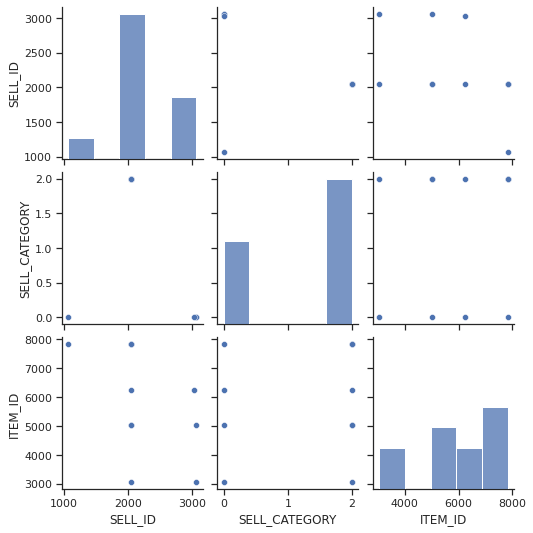

In [8]:
# using seaborn for pair plot
sns.pairplot(sold)

### visualization on transactions data

In [9]:
transactions.head()

,CALENDAR_DATE,PRICE,QUANTITY,SELL_ID,SELL_CATEGORY
0,01/01/12,15.50,46,1070,0
1,01/01/12,12.73,22,2051,2
2,01/01/12,12.75,18,2052,2
3,01/01/12,12.60,30,2053,2
4,01/02/12,15.50,70,1070,0


In [10]:
transactions.describe()
transactions.describe(include = ['O'])

,PRICE,QUANTITY,SELL_ID,SELL_CATEGORY
count,5404.000000,5404.000000,5404.00000,5404.000000
mean,12.868729,44.335307,1806.50000,1.500000
std,1.563922,25.502597,425.25841,0.866106
min,10.120000,8.000000,1070.00000,0.000000
25%,11.530000,24.000000,1805.75000,1.500000
50%,12.640000,36.000000,2051.50000,2.000000
75%,13.557500,60.000000,2052.25000,2.000000
max,16.500000,124.000000,2053.00000,2.000000


,CALENDAR_DATE
count,5404
unique,1348
top,03/01/13
freq,16


In [11]:
# check for null vaules/ missing values
transactions[transactions.isnull().any(axis=1)]

,CALENDAR_DATE,PRICE,QUANTITY,SELL_ID,SELL_CATEGORY


(array([ 360.,  509.,  629., 1351., 1082.,  122.,  389.,  240.,  482.,
         240.]),
 array([10.12 , 10.758, 11.396, 12.034, 12.672, 13.31 , 13.948, 14.586,
        15.224, 15.862, 16.5  ]),
 <BarContainer object of 10 artists>)

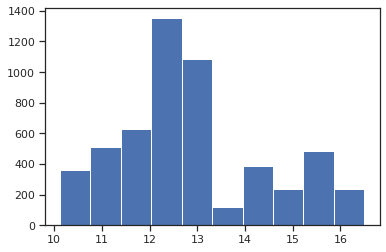

In [12]:
plt.hist(transactions.PRICE)

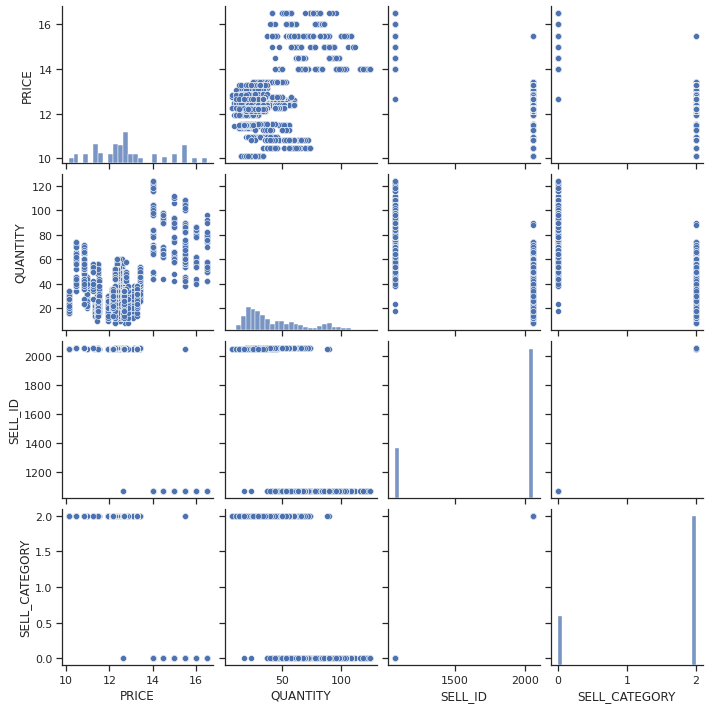

In [13]:
sns.pairplot(transactions)

### visualization on date_info data

In [14]:
date_info.head()

,CALENDAR_DATE,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
0,1/1/12,2012,New Year,1,0,24.8,0
1,1/2/12,2012,New Year,0,0,24.8,0
2,1/3/12,2012,New Year,0,0,32.0,1
3,1/4/12,2012,NaN,0,0,32.0,1
4,1/5/12,2012,NaN,0,0,24.8,0


In [15]:
date_info.describe()
date_info.describe(include=['O'])

,YEAR,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
count,1349.000000,1349.000000,1349.000000,1349.000000,1349.000000
mean,2013.375093,0.285397,0.204596,56.326019,0.862120
std,1.073073,0.451771,0.403556,20.227597,0.344902
min,2012.000000,0.000000,0.000000,14.000000,0.000000
25%,2012.000000,0.000000,0.000000,35.600000,1.000000
50%,2013.000000,0.000000,0.000000,60.800000,1.000000
75%,2014.000000,1.000000,0.000000,75.200000,1.000000
max,2015.000000,1.000000,1.000000,87.800000,1.000000


,CALENDAR_DATE,HOLIDAY
count,1349,105
unique,1348,8
top,3/1/13,Luner New Year
freq,2,28


In [16]:
#check the data type, most of them are categorical variable
date_info.dtypes

CALENDAR_DATE           object
YEAR                     int64
HOLIDAY                 object
IS_WEEKEND               int64
IS_SCHOOLBREAK           int64
AVERAGE_TEMPERATURE    float64
IS_OUTDOOR               int64
dtype: object

In [17]:
#check if there are any nulls
date_info[date_info.isnull().any(axis=1)]

,CALENDAR_DATE,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
3,1/4/12,2012,NaN,0,0,32.0,1
4,1/5/12,2012,NaN,0,0,24.8,0
5,1/6/12,2012,NaN,0,0,23.0,0
6,1/7/12,2012,NaN,1,0,26.6,0
7,1/8/12,2012,NaN,1,0,26.6,0
8,1/9/12,2012,NaN,0,0,23.0,0
9,1/10/12,2012,NaN,0,0,24.8,0
10,1/11/12,2012,NaN,0,0,21.2,0
11,1/12/12,2012,NaN,0,0,24.8,0
12,1/13/12,2012,NaN,0,0,26.6,0


In [18]:
# replace NaN with 'No Holiday'
date_info['HOLIDAY'] = date_info['HOLIDAY'].fillna('No Holiday')

In [19]:
date_info

,CALENDAR_DATE,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
0,1/1/12,2012,New Year,1,0,24.8,0
1,1/2/12,2012,New Year,0,0,24.8,0
2,1/3/12,2012,New Year,0,0,32.0,1
3,1/4/12,2012,No Holiday,0,0,32.0,1
4,1/5/12,2012,No Holiday,0,0,24.8,0
5,1/6/12,2012,No Holiday,0,0,23.0,0
6,1/7/12,2012,No Holiday,1,0,26.6,0
7,1/8/12,2012,No Holiday,1,0,26.6,0
8,1/9/12,2012,No Holiday,0,0,23.0,0
9,1/10/12,2012,No Holiday,0,0,24.8,0


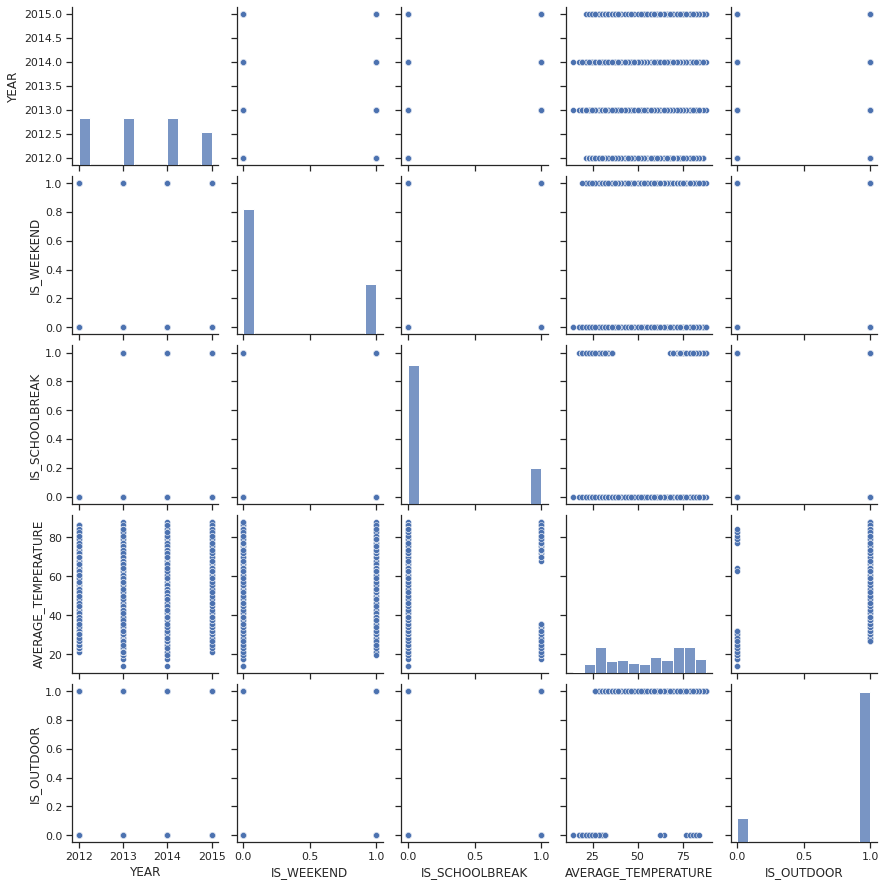

In [20]:
# analyse patern by pairplot
sns.pairplot(date_info)

# Data analysis : further processing for better understanding

In [21]:
# check for the date_info
np.unique(date_info['HOLIDAY'])

array(['Dragon Boat Festivel', 'Labor Day', 'Luner New Year',
       'Mid-Autumn Day', 'National Day', 'New Year', 'No Holiday',
       'Qing Ming Festival', 'WWII Celebration'], dtype=object)

In [22]:
date_info['CALENDAR_DATE'].min()

'1/1/12'

In [23]:
date_info['CALENDAR_DATE'].max()

'9/9/15'

In [24]:
date_info.shape

(1349, 7)

In [25]:
date_info[date_info.isnull().any(axis=1)]

,CALENDAR_DATE,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR


In [26]:
# sold data analysis
sold.describe(include=['O'])

,ITEM_NAME
count,11
unique,4
top,BURGER
freq,4


In [27]:
#Transpose the coulmn of ITEM_NAMES 
pd.concat([sold.SELL_ID,pd.get_dummies(sold.ITEM_NAME)], axis=1)

,SELL_ID,BURGER,COFFEE,COKE,LEMONADE
0,1070,1,0,0,0
1,3055,0,1,0,0
2,3067,0,0,1,0
3,3028,0,0,0,1
4,2051,1,0,0,0
5,2051,0,0,1,0
6,2052,1,0,0,0
7,2052,0,0,0,1
8,2053,1,0,0,0
9,2053,0,0,1,0


In [28]:
# consolidate the data
pd.concat([sold.SELL_ID, pd.get_dummies(sold.ITEM_NAME)], axis=1).groupby(sold.SELL_ID).sum()

,SELL_ID,BURGER,COFFEE,COKE,LEMONADE
SELL_ID,,,,,
1070,1070,1,0,0,0
2051,4102,1,0,1,0
2052,4104,1,0,0,1
2053,6159,1,1,1,0
3028,3028,0,0,0,1
3055,3055,0,1,0,0
3067,3067,0,0,1,0


## Combine all three data set

In [29]:
# merging the sold data and transactions data based on SELL_ID and drop-out the ITEM_ID and SELL_CATEGORY
data1= pd.merge(sold.drop(['ITEM_ID'], axis=1), transactions.drop ('SELL_CATEGORY', axis=1), on= 'SELL_ID')
#data1

In [30]:
# observe first 20 rows
data1.head(20)

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY
0,1070,0,BURGER,01/01/12,15.5,46
1,1070,0,BURGER,01/02/12,15.5,70
2,1070,0,BURGER,01/03/12,15.5,62
3,1070,0,BURGER,01/04/12,15.5,88
4,1070,0,BURGER,01/05/12,15.5,104
5,1070,0,BURGER,01/06/12,15.5,100
6,1070,0,BURGER,01/07/12,15.5,70
7,1070,0,BURGER,01/08/12,15.5,70
8,1070,0,BURGER,01/09/12,15.5,106
9,1070,0,BURGER,01/10/12,15.5,108


In [31]:
b= data1.groupby(['SELL_ID', 'SELL_CATEGORY', 'ITEM_NAME', 'CALENDAR_DATE', 'PRICE']).QUANTITY.sum()

In [32]:
b

SELL_ID  SELL_CATEGORY  ITEM_NAME  CALENDAR_DATE  PRICE
1070     0              BURGER     01/01/12       15.50     46
                                   01/01/13       15.50     60
                                   01/01/14       15.50     72
                                   01/01/15       14.00     66
                                   01/02/12       15.50     70
                                   01/02/13       15.50     68
                                   01/02/14       15.50     76
                                   01/02/15       14.00    102
                                   01/03/12       15.50     62
                                   01/03/13       15.50     70
                                   01/03/14       15.50     68
                                   01/03/15       14.00     68
                                   01/04/12       15.50     88
                                   01/04/13       15.50    100
                                   01/04/14       15.50     74

In [33]:
# check the shape
data1.shape
intermediate_data=b.reset_index()

(10808, 6)

In [34]:
# check the shape
data1.shape

(10808, 6)

In [35]:
# check the shape
b.shape

(10792,)

In [36]:
# first 5 rows
intermediate_data.head()

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY
0,1070,0,BURGER,01/01/12,15.5,46
1,1070,0,BURGER,01/01/13,15.5,60
2,1070,0,BURGER,01/01/14,15.5,72
3,1070,0,BURGER,01/01/15,14.0,66
4,1070,0,BURGER,01/02/12,15.5,70


In [37]:
# check the minimum date
intermediate_data['CALENDAR_DATE'].min()

'01/01/12'

In [38]:
# check the maximum date
intermediate_data['CALENDAR_DATE'].max()

'9/30/14'

In [39]:
# merge the data intermediate_data and date_info based on CALENDER_DATE
combined_data= pd.merge(intermediate_data, date_info, on = 'CALENDAR_DATE')
combined_data.head()

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
0,1070,0,BURGER,1/13/12,15.50,100,2012,No Holiday,0,0,26.6,0
1,2051,2,BURGER,1/13/12,12.73,40,2012,No Holiday,0,0,26.6,0
2,2051,2,COKE,1/13/12,12.73,40,2012,No Holiday,0,0,26.6,0
3,2052,2,BURGER,1/13/12,12.75,26,2012,No Holiday,0,0,26.6,0
4,2052,2,LEMONADE,1/13/12,12.75,26,2012,No Holiday,0,0,26.6,0


### Combined data -->analysis

In [40]:
# check for the shape
combined_data.shape

(6696, 12)

In [41]:
# check for null vaules
combined_data[combined_data.isnull().any(axis=1)]

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR


In [42]:
# check for unique combined_data
np.unique(combined_data['HOLIDAY'])
np.unique(combined_data['IS_WEEKEND'])
np.unique(combined_data['IS_SCHOOLBREAK'])

array(['Dragon Boat Festivel', 'Labor Day', 'Luner New Year',
       'Mid-Autumn Day', 'No Holiday'], dtype=object)

array([0, 1])

array([0, 1])

### Intermediate data derived from combined data --> analysis

In [43]:
# bau_data is "Business As Usual". This data is extracted from the combined data by removing IS_SCHOOLBREAK and IS_WEEKEND
bau_data= combined_data[(combined_data['HOLIDAY']== 'No Holiday') & (combined_data['IS_SCHOOLBREAK'] ==0) & (combined_data['IS_WEEKEND']==0)]
bau_data.head()


,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
0,1070,0,BURGER,1/13/12,15.50,100,2012,No Holiday,0,0,26.6,0
1,2051,2,BURGER,1/13/12,12.73,40,2012,No Holiday,0,0,26.6,0
2,2051,2,COKE,1/13/12,12.73,40,2012,No Holiday,0,0,26.6,0
3,2052,2,BURGER,1/13/12,12.75,26,2012,No Holiday,0,0,26.6,0
4,2052,2,LEMONADE,1/13/12,12.75,26,2012,No Holiday,0,0,26.6,0


In [44]:
bau_data.shape

(3768, 12)

In [45]:
# check for unique bau_data
np.unique(bau_data['HOLIDAY'])
np.unique(bau_data['IS_WEEKEND'])
np.unique(bau_data['IS_SCHOOLBREAK'])

array(['No Holiday'], dtype=object)

array([0])

array([0])

In [46]:
bau_data[bau_data['IS_WEEKEND']==1]

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR


In [47]:
bau_data[bau_data.isnull().any(axis=1)]

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR


## Explore the data

(array([1884.,    0.,    0.,  942.,    0.,    0.,  471.,    0.,    0.,
         471.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

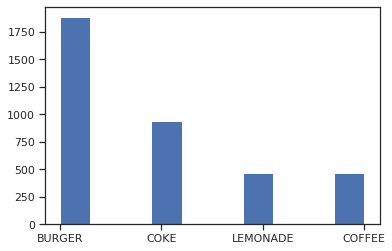

In [48]:
# let's plot the items at cafe
plt.hist(bau_data.ITEM_NAME)

(array([ 411.,  388.,  441., 1159.,  790.,  108.,  122.,  111.,  174.,
          64.]),
 array([10.12 , 10.758, 11.396, 12.034, 12.672, 13.31 , 13.948, 14.586,
        15.224, 15.862, 16.5  ]),
 <BarContainer object of 10 artists>)

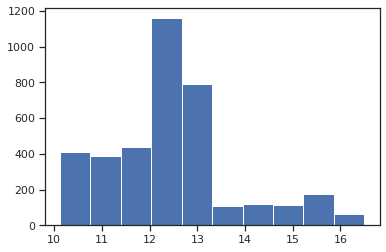

In [49]:
# let's plot the price
plt.hist(bau_data.PRICE)

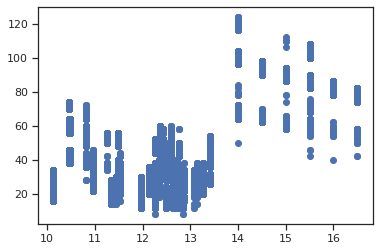

In [50]:
# let's scatter plot PRICE and QUANTITY
plt.scatter(combined_data['PRICE'], combined_data['QUANTITY'])

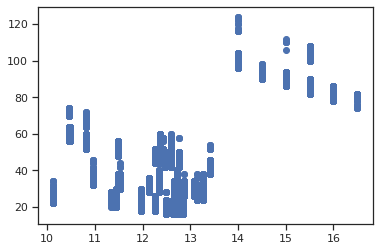

In [51]:
plt.scatter(bau_data['PRICE'], bau_data['QUANTITY'])

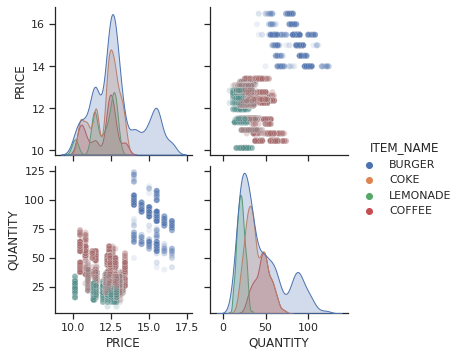

In [52]:
# # let's pair plot PRICE, QUANTITY and ITEM_NAME
sns.pairplot(combined_data[['PRICE', 'QUANTITY', 'ITEM_NAME']], hue= 'ITEM_NAME', plot_kws={'alpha':0.1})

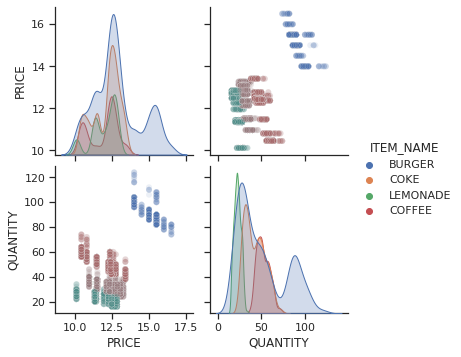

In [53]:
# # let's pair plot PRICE, QUANTITY and ITEM_NAME for Bau_data
sns.pairplot(bau_data[['PRICE', 'QUANTITY', 'ITEM_NAME']], hue= 'ITEM_NAME', plot_kws={'alpha':0.1})

The price density plot is bimodal. From the graph we can see that for all quantities, as the price is increased the quantity sold is decreased. Although coke is hidden in this view. We can go ahead and calculate the price elasticities for this.

### Check for item: burger in combined data

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
0,1070,0,BURGER,1/13/12,15.50,100,2012,No Holiday,0,0,26.6,0
1,2051,2,BURGER,1/13/12,12.73,40,2012,No Holiday,0,0,26.6,0
3,2052,2,BURGER,1/13/12,12.75,26,2012,No Holiday,0,0,26.6,0
5,2053,2,BURGER,1/13/12,12.60,58,2012,No Holiday,0,0,26.6,0
8,1070,0,BURGER,1/13/13,15.50,70,2013,No Holiday,1,0,30.2,0


(3348, 12)

,SELL_ID,SELL_CATEGORY,PRICE,QUANTITY,YEAR,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
count,3348.000000,3348.000000,3348.000000,3348.000000,3348.000000,3348.000000,3348.000000,3348.000000,3348.000000
mean,1806.500000,1.500000,12.858572,44.974313,2013.351254,0.284349,0.200717,56.255914,0.878136
std,425.282579,0.866155,1.565046,25.747886,1.062567,0.451171,0.400596,19.996348,0.327177
min,1070.000000,0.000000,10.120000,8.000000,2012.000000,0.000000,0.000000,14.000000,0.000000
25%,1805.750000,1.500000,11.530000,24.000000,2012.000000,0.000000,0.000000,35.600000,1.000000
50%,2051.500000,2.000000,12.640000,36.000000,2013.000000,0.000000,0.000000,59.000000,1.000000
75%,2052.250000,2.000000,13.557500,60.000000,2014.000000,1.000000,0.000000,75.200000,1.000000
max,2053.000000,2.000000,16.500000,124.000000,2015.000000,1.000000,1.000000,87.800000,1.000000


<AxesSubplot:xlabel='PRICE', ylabel='QUANTITY'>

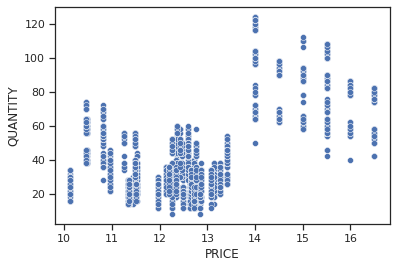

In [54]:
burger= combined_data[combined_data['ITEM_NAME']== 'BURGER']
burger.head()
burger.shape
burger.describe()
sns.scatterplot(x= burger.PRICE, y= burger.QUANTITY)

From the above scatter plot it is clearly visible that there must be different types of burgers being sold. Now let's see the same distributin when we differentiate with SELL_ID which indicates if the burger was a part of the combo and hence, must be treated separately.

<AxesSubplot:xlabel='PRICE', ylabel='QUANTITY'>

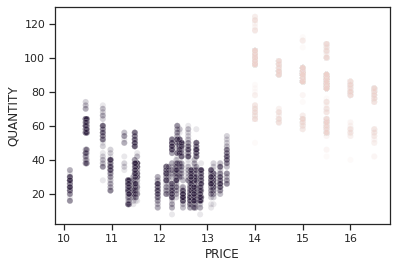

In [55]:
burger = combined_data[combined_data['ITEM_NAME'] == 'BURGER']
# print(burger)
# print(burger.describe())
sns.scatterplot(data = burger, x = burger.PRICE, y = burger.QUANTITY , hue = 'SELL_ID', legend=False, alpha = 0.1)

The above scatter plot shows that there are different types of SELL_IDs for item burger

In [56]:
np.unique(combined_data.SELL_ID)

array([1070, 2051, 2052, 2053])

In [57]:
np.unique(combined_data.SELL_CATEGORY)

array([0, 2])

#### Check for item: burger with Sell_ID 1070

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
0,1070,0,BURGER,1/13/12,15.5,100,2012,No Holiday,0,0,26.6,0
8,1070,0,BURGER,1/13/13,15.5,70,2013,No Holiday,1,0,30.2,0
16,1070,0,BURGER,1/13/14,15.5,104,2014,No Holiday,0,0,28.4,0
24,1070,0,BURGER,1/13/15,14.0,116,2015,No Holiday,0,0,28.4,0
32,1070,0,BURGER,1/14/12,15.5,74,2012,No Holiday,1,0,23.0,0


,SELL_ID,SELL_CATEGORY,PRICE,QUANTITY,YEAR,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
count,837.0,837.0,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000
mean,1070.0,0.0,15.154719,82.685783,2013.351254,0.284349,0.200717,56.255914,0.878136
std,0.0,0.0,0.744770,15.981238,1.063043,0.451373,0.400776,20.005316,0.327324
min,1070.0,0.0,14.000000,40.000000,2012.000000,0.000000,0.000000,14.000000,0.000000
25%,1070.0,0.0,14.500000,68.000000,2012.000000,0.000000,0.000000,35.600000,1.000000
50%,1070.0,0.0,15.500000,86.000000,2013.000000,0.000000,0.000000,59.000000,1.000000
75%,1070.0,0.0,15.500000,92.000000,2014.000000,1.000000,0.000000,75.200000,1.000000
max,1070.0,0.0,16.500000,124.000000,2015.000000,1.000000,1.000000,87.800000,1.000000


<AxesSubplot:xlabel='PRICE', ylabel='QUANTITY'>

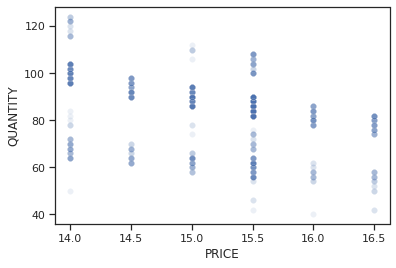

In [58]:
burger_1070 = combined_data[(combined_data['ITEM_NAME'] == 'BURGER') & (combined_data['SELL_ID'] == 1070)]
burger_1070.head()
burger_1070.describe()
sns.scatterplot(data = burger_1070, x = burger_1070.PRICE, y = burger_1070.QUANTITY, alpha = 0.1)

# Start Modeling

There is a relationship in-between quantities and price. Therefore the modelling is realized with ordinary least square regression method. 

## burger model

### burger model: by using combined data

                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     153.9
Date:                Mon, 21 Nov 2022   Prob (F-statistic):           1.45e-32
Time:                        11:19:26   Log-Likelihood:                -3436.0
No. Observations:                 837   AIC:                             6876.
Df Residuals:                     835   BIC:                             6885.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    210.9859     10.353     20.379      0.0

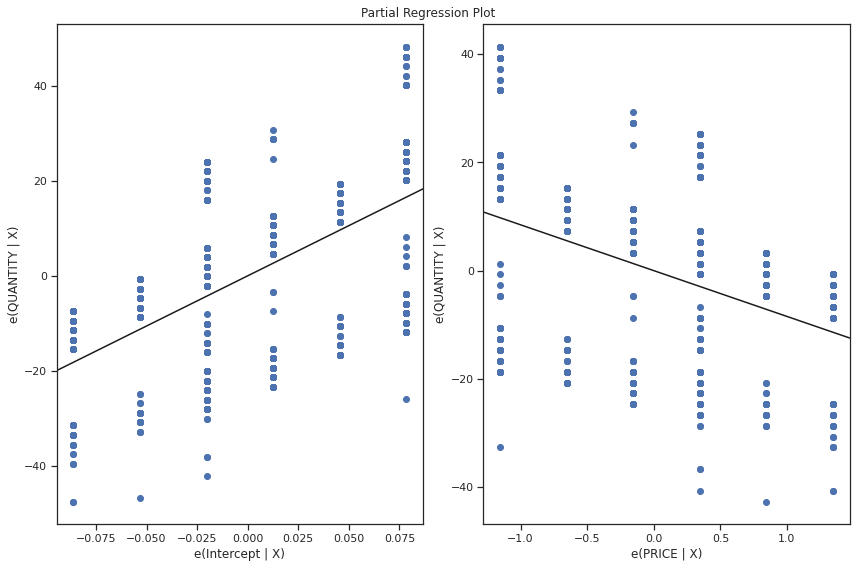

In [59]:
# This is for the combined data
burger_model = ols("QUANTITY ~ PRICE", data=burger_1070).fit()
print(burger_model.summary())
fig= plt.figure(figsize=(12,8))
fig=sm.graphics.plot_partregress_grid(burger_model, fig=fig)

in the above model, the R^2 is very low 0.156 and the elasticity (price) -8.4
The model needs to be tuned, the data is not good enough. 

### burger model: by using bau data

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
0,1070,0,BURGER,1/13/12,15.50,100,2012,No Holiday,0,0,26.6,0
1,2051,2,BURGER,1/13/12,12.73,40,2012,No Holiday,0,0,26.6,0
3,2052,2,BURGER,1/13/12,12.75,26,2012,No Holiday,0,0,26.6,0
5,2053,2,BURGER,1/13/12,12.60,58,2012,No Holiday,0,0,26.6,0
16,1070,0,BURGER,1/13/14,15.50,104,2014,No Holiday,0,0,28.4,0


(1884, 12)

,SELL_ID,SELL_CATEGORY,PRICE,QUANTITY,YEAR,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
count,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000,1884.0,1884.0,1884.000000,1884.000000
mean,1806.500000,1.500000,12.830340,49.562633,2013.186837,0.0,0.0,53.691720,0.883227
std,425.331956,0.866255,1.567257,27.309516,1.058620,0.0,0.0,18.721922,0.321235
min,1070.000000,0.000000,10.120000,16.000000,2012.000000,0.0,0.0,14.000000,0.000000
25%,1805.750000,1.500000,11.530000,28.000000,2012.000000,0.0,0.0,35.600000,1.000000
50%,2051.500000,2.000000,12.640000,40.000000,2013.000000,0.0,0.0,53.600000,1.000000
75%,2052.250000,2.000000,13.557500,74.000000,2014.000000,0.0,0.0,71.600000,1.000000
max,2053.000000,2.000000,16.500000,124.000000,2015.000000,0.0,0.0,87.800000,1.000000


<AxesSubplot:xlabel='PRICE', ylabel='QUANTITY'>

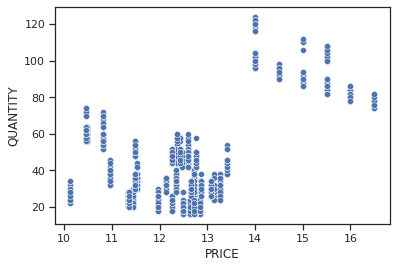

In [60]:
burger = bau_data[bau_data['ITEM_NAME'] == 'BURGER'] # for Burger
burger.head()
burger.shape
burger.describe()
sns.scatterplot(x=burger.PRICE, y= burger.QUANTITY)

<AxesSubplot:xlabel='PRICE', ylabel='QUANTITY'>

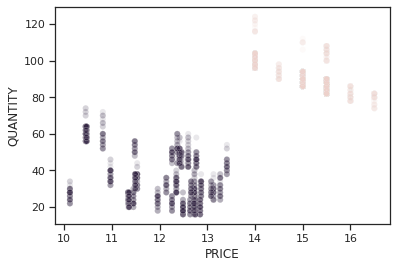

In [61]:
# print(burger)
# print(burger.describe())
sns.scatterplot(data = burger, x = burger.PRICE, y = burger.QUANTITY , hue = 'SELL_ID', legend=False, alpha = 0.1)

In [62]:
np.unique(bau_data.SELL_ID)

array([1070, 2051, 2052, 2053])

In [63]:
np.unique(bau_data.SELL_CATEGORY)

array([0, 2])

### burger model: for SELL_ID 1070 by using bau data

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
0,1070,0,BURGER,1/13/12,15.5,100,2012,No Holiday,0,0,26.6,0
16,1070,0,BURGER,1/13/14,15.5,104,2014,No Holiday,0,0,28.4,0
24,1070,0,BURGER,1/13/15,14.0,116,2015,No Holiday,0,0,28.4,0
48,1070,0,BURGER,1/14/14,15.5,86,2014,No Holiday,0,0,28.4,1
56,1070,0,BURGER,1/14/15,14.0,122,2015,No Holiday,0,0,30.2,0


,SELL_ID,SELL_CATEGORY,PRICE,QUANTITY,YEAR,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
count,471.0,471.0,471.000000,471.000000,471.000000,471.0,471.0,471.000000,471.000000
mean,1070.0,0.0,15.124204,91.622081,2013.186837,0.0,0.0,53.691720,0.883227
std,0.0,0.0,0.705577,9.437897,1.059464,0.0,0.0,18.736854,0.321491
min,1070.0,0.0,14.000000,74.000000,2012.000000,0.0,0.0,14.000000,0.000000
25%,1070.0,0.0,14.500000,86.000000,2012.000000,0.0,0.0,35.600000,1.000000
50%,1070.0,0.0,15.500000,90.000000,2013.000000,0.0,0.0,53.600000,1.000000
75%,1070.0,0.0,15.500000,98.000000,2014.000000,0.0,0.0,70.700000,1.000000
max,1070.0,0.0,16.500000,124.000000,2015.000000,0.0,0.0,87.800000,1.000000


<AxesSubplot:xlabel='PRICE', ylabel='QUANTITY'>

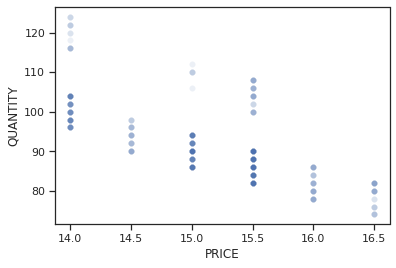

In [64]:
burger_1070 = bau_data[(bau_data['ITEM_NAME'] == 'BURGER') & (bau_data['SELL_ID'] == 1070)]
burger_1070.head()
burger_1070.describe()
sns.scatterplot(data = burger_1070, x = burger_1070.PRICE, y = burger_1070.QUANTITY, alpha = 0.1)

                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.486
Model:                            OLS   Adj. R-squared:                  0.485
Method:                 Least Squares   F-statistic:                     444.2
Date:                Mon, 21 Nov 2022   Prob (F-statistic):           7.16e-70
Time:                        11:19:27   Log-Likelihood:                -1568.2
No. Observations:                 471   AIC:                             3140.
Df Residuals:                     469   BIC:                             3149.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    232.7193      6.702     34.726      0.0

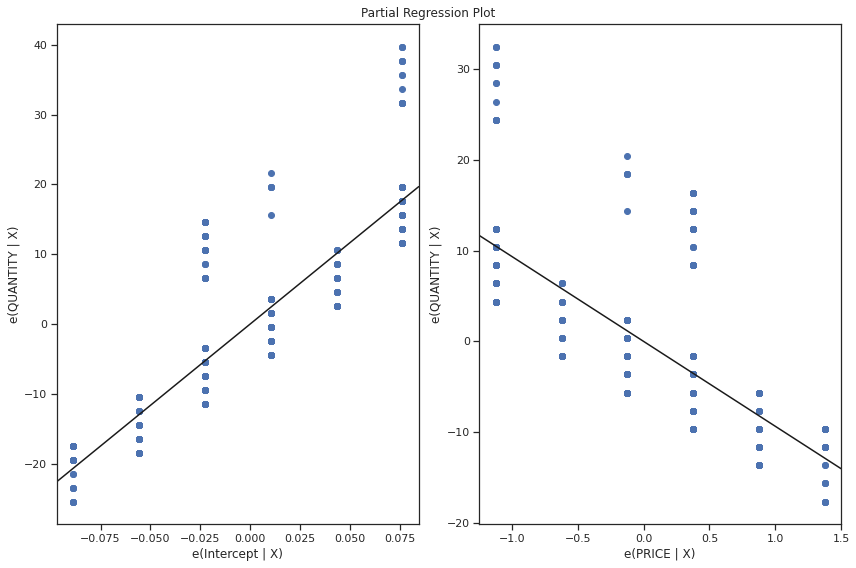

In [65]:
# This is for the bau data
burger_model = ols("QUANTITY ~ PRICE", data=burger_1070).fit()
print(burger_model.summary())
fig= plt.figure(figsize=(12,8))
fig=sm.graphics.plot_partregress_grid(burger_model, fig=fig)

Once again let's observe at the bau data again, if there is anything else in the data we can use to further refine our model.

In [66]:
bau_data.head()

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
0,1070,0,BURGER,1/13/12,15.50,100,2012,No Holiday,0,0,26.6,0
1,2051,2,BURGER,1/13/12,12.73,40,2012,No Holiday,0,0,26.6,0
2,2051,2,COKE,1/13/12,12.73,40,2012,No Holiday,0,0,26.6,0
3,2052,2,BURGER,1/13/12,12.75,26,2012,No Holiday,0,0,26.6,0
4,2052,2,LEMONADE,1/13/12,12.75,26,2012,No Holiday,0,0,26.6,0


### re-defining burger model: for SELL_ID 1070 by using bau data for IS_OUTDOOR

In [67]:
bau2_data=bau_data[(bau_data['IS_OUTDOOR']==1)]
bau2_data.head()

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
48,1070,0,BURGER,1/14/14,15.50,86,2014,No Holiday,0,0,28.4,1
49,2051,2,BURGER,1/14/14,13.27,24,2014,No Holiday,0,0,28.4,1
50,2051,2,COKE,1/14/14,13.27,24,2014,No Holiday,0,0,28.4,1
51,2052,2,BURGER,1/14/14,11.96,26,2014,No Holiday,0,0,28.4,1
52,2052,2,LEMONADE,1/14/14,11.96,26,2014,No Holiday,0,0,28.4,1


,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
48,1070,0,BURGER,1/14/14,15.5,86,2014,No Holiday,0,0,28.4,1
88,1070,0,BURGER,1/15/15,14.0,104,2015,No Holiday,0,0,32.0,1
120,1070,0,BURGER,1/16/15,14.0,100,2015,No Holiday,0,0,32.0,1
448,1070,0,BURGER,1/27/12,15.5,86,2012,No Holiday,0,0,32.0,1
576,1070,0,BURGER,1/31/12,15.5,84,2012,No Holiday,0,0,32.0,1


,SELL_ID,SELL_CATEGORY,PRICE,QUANTITY,YEAR,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
count,416.0,416.0,416.000000,416.000000,416.000000,416.0,416.0,416.000000,416.0
mean,1070.0,0.0,15.139423,89.274038,2013.201923,0.0,0.0,57.282212,1.0
std,0.0,0.0,0.709511,6.811889,1.076628,0.0,0.0,16.890613,0.0
min,1070.0,0.0,14.000000,74.000000,2012.000000,0.0,0.0,26.600000,1.0
25%,1070.0,0.0,14.500000,84.000000,2012.000000,0.0,0.0,41.000000,1.0
50%,1070.0,0.0,15.000000,88.000000,2013.000000,0.0,0.0,59.000000,1.0
75%,1070.0,0.0,15.500000,94.000000,2014.000000,0.0,0.0,71.600000,1.0
max,1070.0,0.0,16.500000,104.000000,2015.000000,0.0,0.0,87.800000,1.0


<AxesSubplot:xlabel='PRICE', ylabel='QUANTITY'>

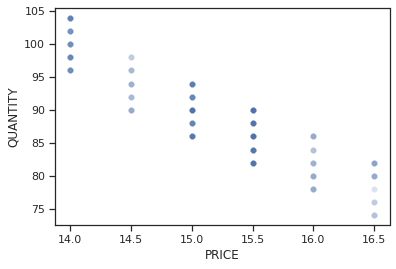

In [68]:
burger_1070 = bau2_data[(bau2_data['ITEM_NAME'] == 'BURGER') & (bau2_data['SELL_ID'] == 1070)]
burger_1070.head()
burger_1070.describe()
sns.scatterplot(data = burger_1070, x = burger_1070.PRICE, y = burger_1070.QUANTITY, alpha = 0.1)

                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     1804.
Date:                Mon, 21 Nov 2022   Prob (F-statistic):          5.51e-153
Time:                        11:19:28   Log-Likelihood:                -1038.8
No. Observations:                 416   AIC:                             2082.
Df Residuals:                     414   BIC:                             2090.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    220.3600      3.090     71.322      0.0

<Figure size 864x576 with 0 Axes>

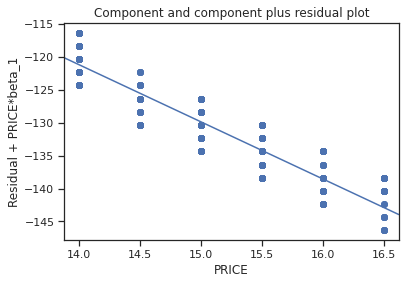

In [69]:
burger_model = ols("QUANTITY ~ PRICE", data=burger_1070).fit()
print(burger_model.summary())
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_ccpr(burger_model, "PRICE")

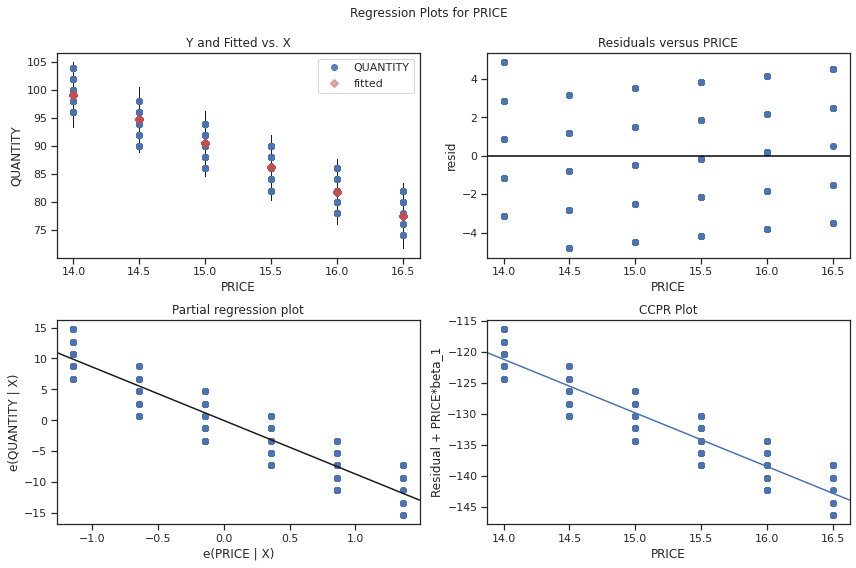

In [70]:
# plot 
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(burger_model, "PRICE", fig=fig)

### burger model: for SELL_ID 2051 by using combined_data

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
1,2051,2,BURGER,1/13/12,12.73,40,2012,No Holiday,0,0,26.6,0
9,2051,2,BURGER,1/13/13,13.13,26,2013,No Holiday,1,0,30.2,0
17,2051,2,BURGER,1/13/14,13.27,38,2014,No Holiday,0,0,28.4,0
25,2051,2,BURGER,1/13/15,11.53,38,2015,No Holiday,0,0,28.4,0
33,2051,2,BURGER,1/14/12,12.73,24,2012,No Holiday,1,0,23.0,0


,SELL_ID,SELL_CATEGORY,PRICE,QUANTITY,YEAR,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
count,837.0,837.0,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000
mean,2051.0,2.0,12.368017,29.498208,2013.351254,0.284349,0.200717,56.255914,0.878136
std,0.0,0.0,0.726329,5.782878,1.063043,0.451373,0.400776,20.005316,0.327324
min,2051.0,2.0,10.970000,12.000000,2012.000000,0.000000,0.000000,14.000000,0.000000
25%,2051.0,2.0,11.530000,26.000000,2012.000000,0.000000,0.000000,35.600000,1.000000
50%,2051.0,2.0,12.660000,30.000000,2013.000000,0.000000,0.000000,59.000000,1.000000
75%,2051.0,2.0,13.080000,34.000000,2014.000000,1.000000,0.000000,75.200000,1.000000
max,2051.0,2.0,13.270000,46.000000,2015.000000,1.000000,1.000000,87.800000,1.000000


<AxesSubplot:xlabel='PRICE', ylabel='QUANTITY'>

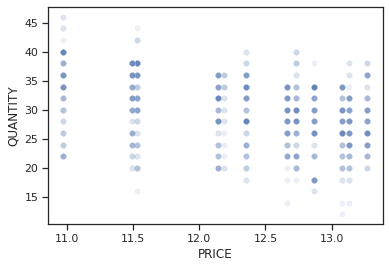

In [71]:
burger_2051 = combined_data[(combined_data['ITEM_NAME'] == 'BURGER') & (combined_data['SELL_ID'] == 2051)]
burger_2051.head()
burger_2051.describe()
sns.scatterplot(data = burger_2051, x = burger_2051.PRICE, y = burger_2051.QUANTITY, alpha = 0.1)

                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.130
Model:                            OLS   Adj. R-squared:                  0.129
Method:                 Least Squares   F-statistic:                     124.7
Date:                Mon, 21 Nov 2022   Prob (F-statistic):           4.45e-27
Time:                        11:19:30   Log-Likelihood:                -2597.8
No. Observations:                 837   AIC:                             5200.
Df Residuals:                     835   BIC:                             5209.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     64.9906      3.184     20.411      0.0

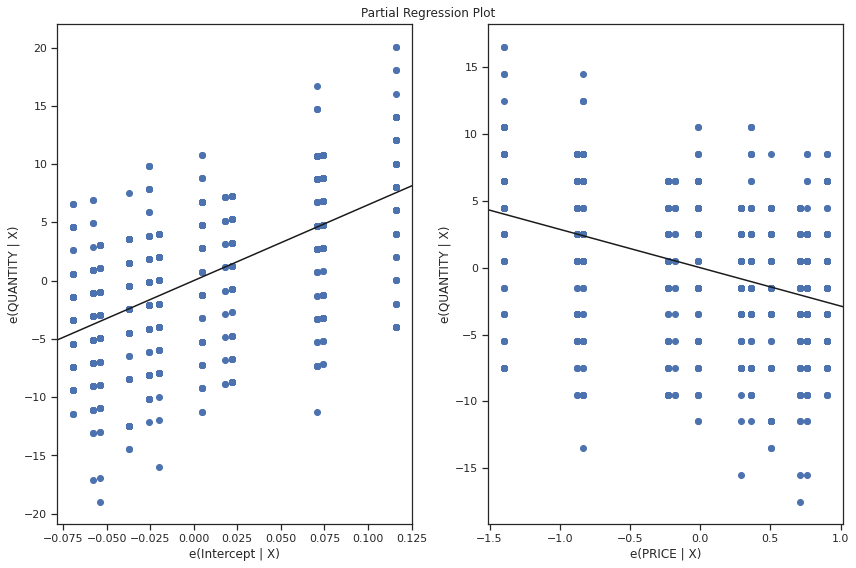

In [72]:
burger_model = ols("QUANTITY ~ PRICE", data=burger_2051).fit()
print(burger_model.summary())
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(burger_model, fig=fig)

### coke model: using combined_data

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
2,2051,2,COKE,1/13/12,12.73,40,2012,No Holiday,0,0,26.6,0
7,2053,2,COKE,1/13/12,12.60,58,2012,No Holiday,0,0,26.6,0
10,2051,2,COKE,1/13/13,13.13,26,2013,No Holiday,1,0,30.2,0
15,2053,2,COKE,1/13/13,13.41,32,2013,No Holiday,1,0,30.2,0
18,2051,2,COKE,1/13/14,13.27,38,2014,No Holiday,0,0,28.4,0


(1674, 12)

,SELL_ID,SELL_CATEGORY,PRICE,QUANTITY,YEAR,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
count,1674.000000,1674.0,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000
mean,2052.000000,2.0,12.151326,38.150538,2013.351254,0.284349,0.200717,56.255914,0.878136
std,1.000299,0.0,0.871405,11.861375,1.062726,0.451239,0.400656,19.999336,0.327226
min,2051.000000,2.0,10.450000,12.000000,2012.000000,0.000000,0.000000,14.000000,0.000000
25%,2051.000000,2.0,11.490000,30.000000,2012.000000,0.000000,0.000000,35.600000,1.000000
50%,2052.000000,2.0,12.370000,36.000000,2013.000000,0.000000,0.000000,59.000000,1.000000
75%,2053.000000,2.0,12.770000,48.000000,2014.000000,1.000000,0.000000,75.200000,1.000000
max,2053.000000,2.0,13.410000,74.000000,2015.000000,1.000000,1.000000,87.800000,1.000000


<AxesSubplot:xlabel='PRICE', ylabel='QUANTITY'>

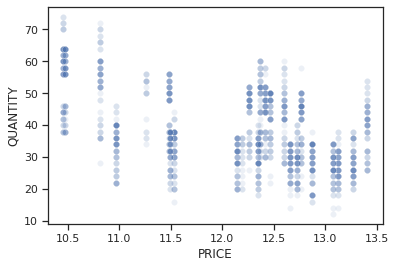

In [73]:
coke = combined_data[combined_data['ITEM_NAME'] == 'COKE'] # for coke
coke.head()
coke.shape
coke.describe()
sns.scatterplot(x = coke.PRICE, y = coke.QUANTITY , alpha = 0.1)

                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                     544.2
Date:                Mon, 21 Nov 2022   Prob (F-statistic):          1.94e-104
Time:                        11:19:30   Log-Likelihood:                -6279.2
No. Observations:                1674   AIC:                         1.256e+04
Df Residuals:                    1672   BIC:                         1.257e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    120.1140      3.522     34.100      0.0

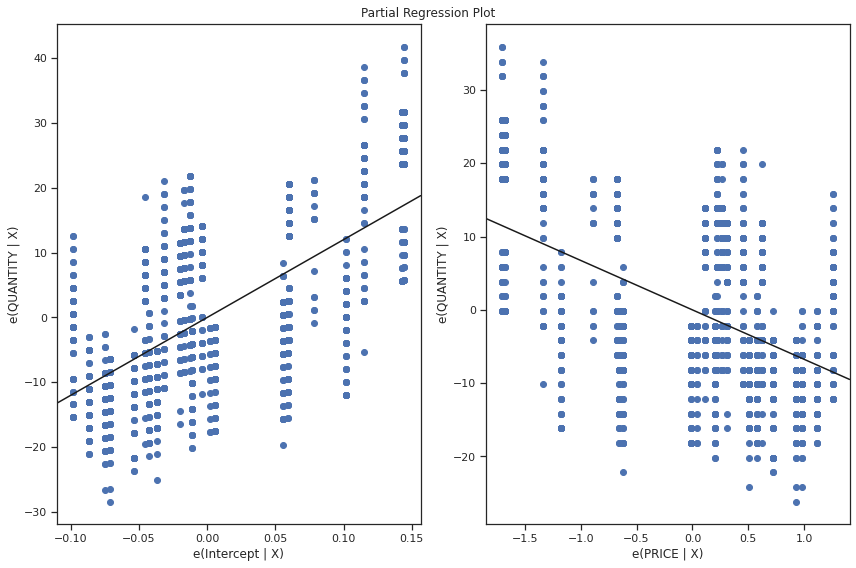

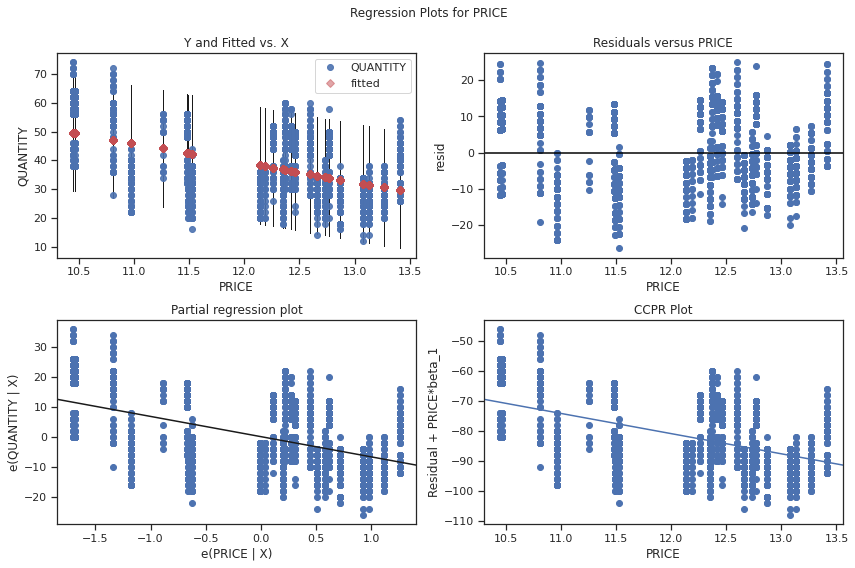

In [74]:
coke_model = ols("QUANTITY ~ PRICE", data=coke).fit()
print(coke_model.summary())
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(coke_model, fig=fig)
fig = plt.figure(figsize=(12,8))
fig=sm.graphics.plot_regress_exog(coke_model, 'PRICE', fig=fig)

### coffee model: using combined_data

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
6,2053,2,COFFEE,1/13/12,12.60,58,2012,No Holiday,0,0,26.6,0
14,2053,2,COFFEE,1/13/13,13.41,32,2013,No Holiday,1,0,30.2,0
22,2053,2,COFFEE,1/13/14,12.37,60,2014,No Holiday,0,0,28.4,0
30,2053,2,COFFEE,1/13/15,10.81,66,2015,No Holiday,0,0,28.4,0
38,2053,2,COFFEE,1/14/12,12.60,42,2012,No Holiday,1,0,23.0,0


(837, 12)

,SELL_ID,SELL_CATEGORY,PRICE,QUANTITY,YEAR,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
count,837.0,837.0,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000
mean,2053.0,2.0,11.934636,46.802867,2013.351254,0.284349,0.200717,56.255914,0.878136
std,0.0,0.0,0.947643,9.909910,1.063043,0.451373,0.400776,20.005316,0.327324
min,2053.0,2.0,10.450000,20.000000,2012.000000,0.000000,0.000000,14.000000,0.000000
25%,2053.0,2.0,10.810000,40.000000,2012.000000,0.000000,0.000000,35.600000,1.000000
50%,2053.0,2.0,12.370000,48.000000,2013.000000,0.000000,0.000000,59.000000,1.000000
75%,2053.0,2.0,12.600000,54.000000,2014.000000,1.000000,0.000000,75.200000,1.000000
max,2053.0,2.0,13.410000,74.000000,2015.000000,1.000000,1.000000,87.800000,1.000000


<AxesSubplot:xlabel='PRICE', ylabel='QUANTITY'>

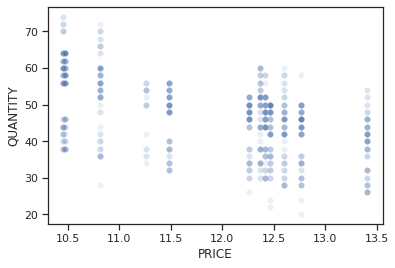

In [75]:
coffee = combined_data[combined_data['ITEM_NAME'] == 'COFFEE'] # for coffee
coffee.head()
coffee.shape
coffee.describe()
sns.scatterplot(x = coffee.PRICE, y = coffee.QUANTITY , alpha = 0.1)

                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     327.0
Date:                Mon, 21 Nov 2022   Prob (F-statistic):           6.20e-62
Time:                        11:19:32   Log-Likelihood:                -2968.5
No. Observations:                 837   AIC:                             5941.
Df Residuals:                     835   BIC:                             5951.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    113.0116      3.673     30.770      0.0

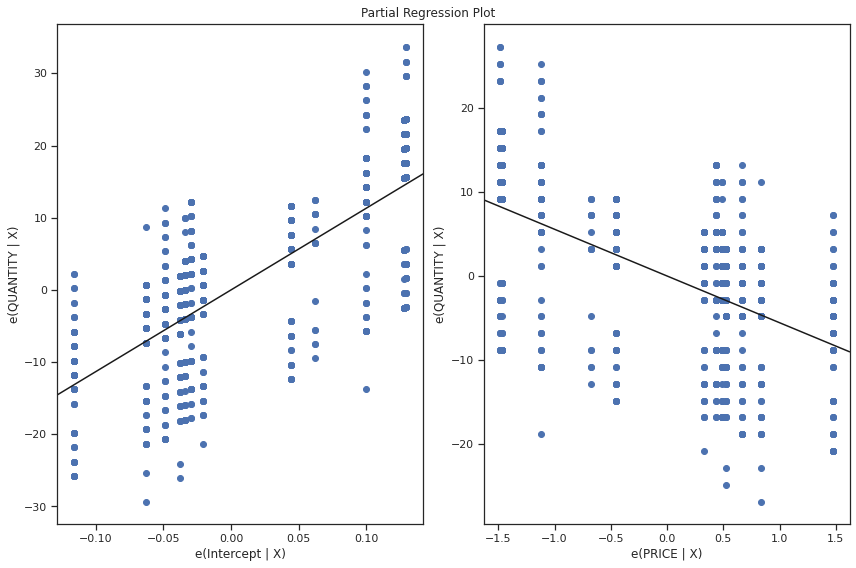

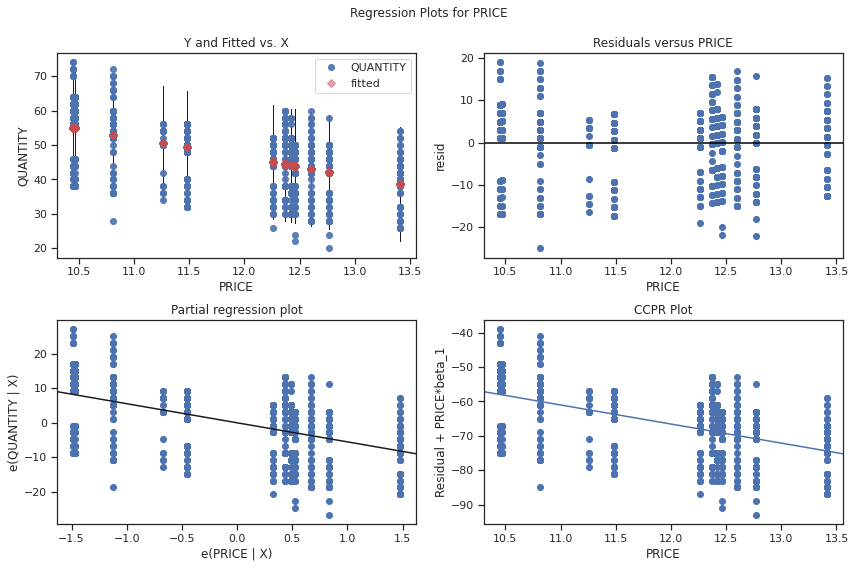

In [76]:
coffee_model = ols("QUANTITY ~ PRICE", data=coffee).fit()
print(coffee_model.summary())
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(coffee_model, fig=fig)
fig = plt.figure(figsize=(12,8))
fig=sm.graphics.plot_regress_exog(coffee_model, 'PRICE', fig=fig)

### lemonade model: using combined_data

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
4,2052,2,LEMONADE,1/13/12,12.75,26,2012,No Holiday,0,0,26.6,0
12,2052,2,LEMONADE,1/13/13,12.64,18,2013,No Holiday,1,0,30.2,0
20,2052,2,LEMONADE,1/13/14,11.96,24,2014,No Holiday,0,0,28.4,0
28,2052,2,LEMONADE,1/13/15,11.45,28,2015,No Holiday,0,0,28.4,0
36,2052,2,LEMONADE,1/14/12,12.75,20,2012,No Holiday,1,0,23.0,0


(837, 12)

,SELL_ID,SELL_CATEGORY,PRICE,QUANTITY,YEAR,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
count,837.0,837.0,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000
mean,2052.0,2.0,11.976918,20.910394,2013.351254,0.284349,0.200717,56.255914,0.878136
std,0.0,0.0,0.820698,4.514501,1.063043,0.451373,0.400776,20.005316,0.327324
min,2052.0,2.0,10.120000,8.000000,2012.000000,0.000000,0.000000,14.000000,0.000000
25%,2052.0,2.0,11.360000,18.000000,2012.000000,0.000000,0.000000,35.600000,1.000000
50%,2052.0,2.0,12.260000,20.000000,2013.000000,0.000000,0.000000,59.000000,1.000000
75%,2052.0,2.0,12.720000,24.000000,2014.000000,1.000000,0.000000,75.200000,1.000000
max,2052.0,2.0,12.850000,34.000000,2015.000000,1.000000,1.000000,87.800000,1.000000


<AxesSubplot:xlabel='PRICE', ylabel='QUANTITY'>

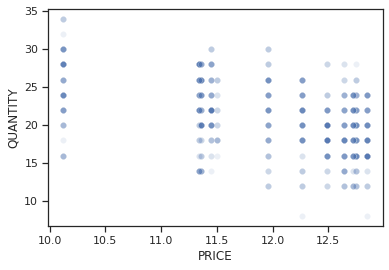

In [77]:
lemonade = combined_data[combined_data['ITEM_NAME'] == 'LEMONADE'] # for lemonade
lemonade.head()
lemonade.shape
lemonade.describe()
sns.scatterplot(x = lemonade.PRICE, y = lemonade.QUANTITY , alpha = 0.1)

                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     228.7
Date:                Mon, 21 Nov 2022   Prob (F-statistic):           7.46e-46
Time:                        11:19:35   Log-Likelihood:                -2347.4
No. Observations:                 837   AIC:                             4699.
Df Residuals:                     835   BIC:                             4708.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     51.4615      2.025     25.416      0.0

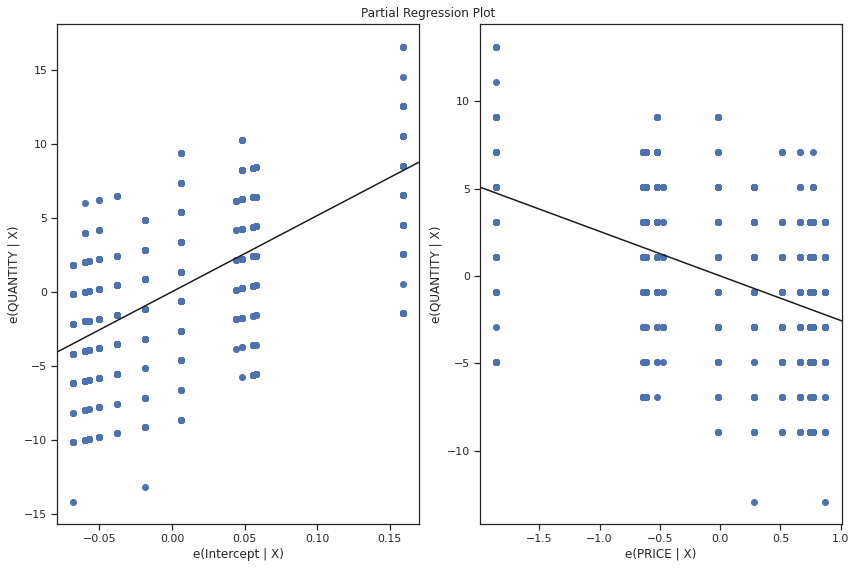

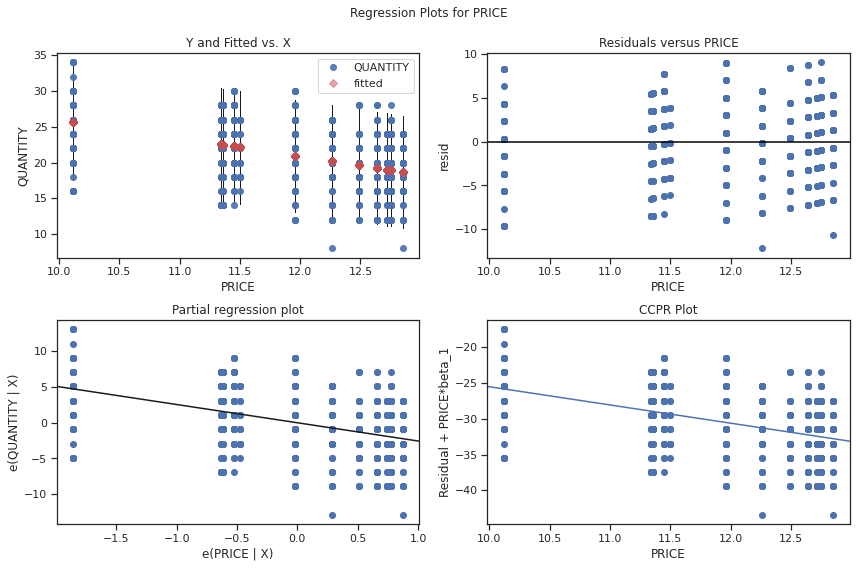

In [78]:
lemonade_model = ols("QUANTITY ~ PRICE", data=lemonade).fit()
print(lemonade_model.summary())
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(lemonade_model, fig=fig)
fig = plt.figure(figsize=(12,8))
fig=sm.graphics.plot_regress_exog(lemonade_model, 'PRICE', fig=fig)

# Define a function: elasticities

In [79]:
elasticities={}

In [80]:
# function to create a model and finding elasticity
def create_model_and_find_elasticity(data):
    model = ols("QUANTITY ~ PRICE", data).fit() # fit the model
    price_elasticity = model.params[1]
    print("Price elasticity of the product: " + str(price_elasticity))
    print(model.summary()) # check for summary 
    fig = plt.figure(figsize=(12,8))
    fig = sm.graphics.plot_partregress_grid(model, fig=fig) # plot
    return price_elasticity, model

## model: burger_1070 and price elasticity

Price elasticity of the product: -8.658581488470567
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     1804.
Date:                Mon, 21 Nov 2022   Prob (F-statistic):          5.51e-153
Time:                        11:19:36   Log-Likelihood:                -1038.8
No. Observations:                 416   AIC:                             2082.
Df Residuals:                     414   BIC:                             2090.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------


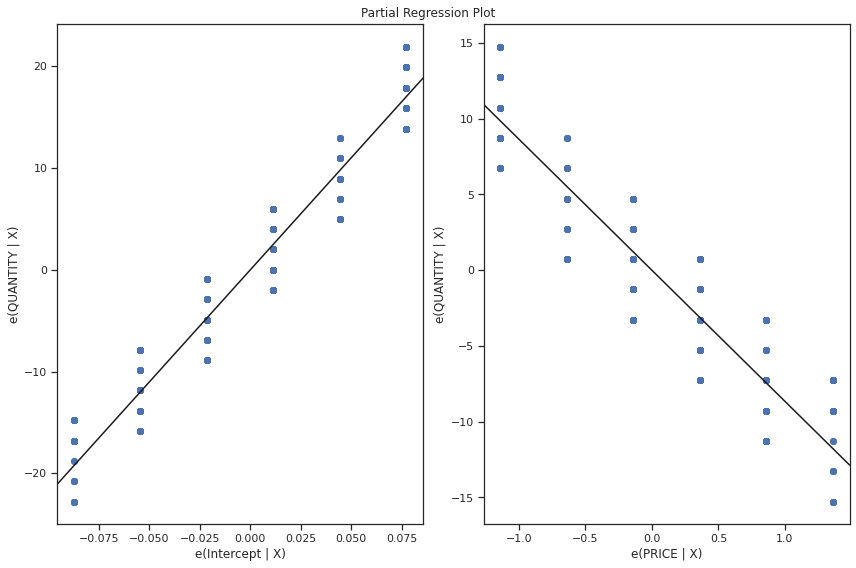

In [81]:
price_elasticity, model_burger_1070 = create_model_and_find_elasticity(burger_1070)
elasticities['burger_1070'] = price_elasticity

## model: burger_2051 and price elasticity

Price elasticity of the product: -3.618990615456309
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.466
Method:                 Least Squares   F-statistic:                     363.3
Date:                Mon, 21 Nov 2022   Prob (F-statistic):           1.34e-58
Time:                        11:19:37   Log-Likelihood:                -1021.5
No. Observations:                 416   AIC:                             2047.
Df Residuals:                     414   BIC:                             2055.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------


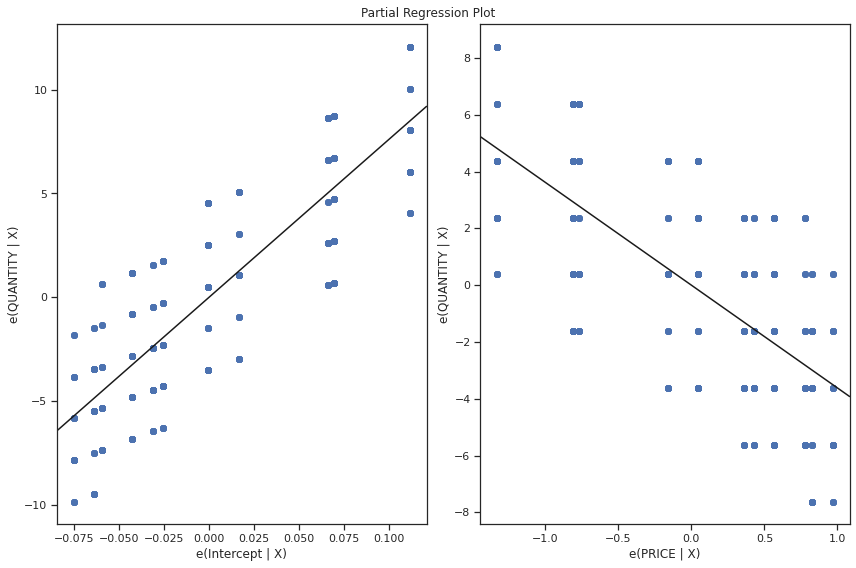

In [82]:
burger2051_data = bau2_data[(bau2_data['ITEM_NAME'] == "BURGER") & (bau2_data['SELL_ID'] == 2051)]
elasticities['burger_2051'], model_burger_2051 = create_model_and_find_elasticity(burger2051_data)

## model: burger_2052 and price elasticity

Price elasticity of the product: -2.8567029845599605
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                     316.5
Date:                Mon, 21 Nov 2022   Prob (F-statistic):           5.32e-53
Time:                        11:19:37   Log-Likelihood:                -1014.7
No. Observations:                 416   AIC:                             2033.
Df Residuals:                     414   BIC:                             2041.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

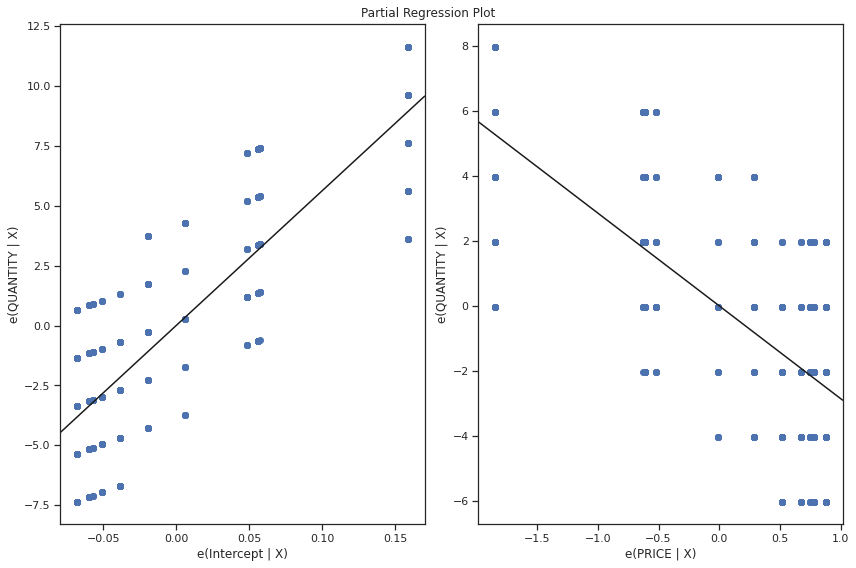

In [83]:
burger2052_data = bau2_data[(bau2_data['ITEM_NAME'] == "BURGER") & (bau2_data['SELL_ID'] == 2052)]
elasticities['burger_2052'], model_burger_2052 = create_model_and_find_elasticity(burger2052_data)

## model: burger_2053 and price elasticity

Price elasticity of the product: -6.164156666230162
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1784.
Date:                Mon, 21 Nov 2022   Prob (F-statistic):          3.72e-152
Time:                        11:19:38   Log-Likelihood:                -1035.7
No. Observations:                 416   AIC:                             2075.
Df Residuals:                     414   BIC:                             2083.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------


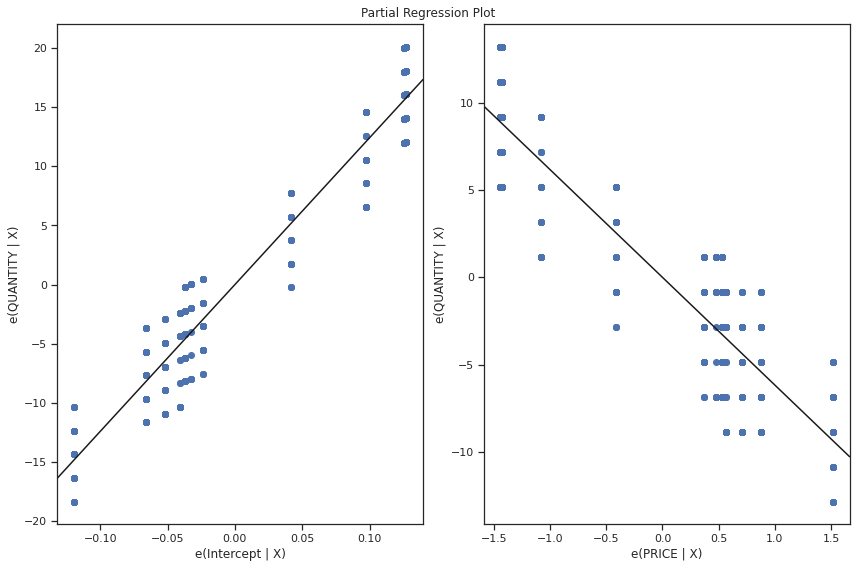

In [84]:
burger2053_data = bau2_data[(bau2_data['ITEM_NAME'] == "BURGER") & (bau2_data['SELL_ID'] == 2053)]
elasticities['burger_2053'], model_burger_2053 = create_model_and_find_elasticity(burger2053_data)

## model: coke and price elasticity

Price elasticity of the product: -7.460103485084992
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.359
Method:                 Least Squares   F-statistic:                     466.3
Date:                Mon, 21 Nov 2022   Prob (F-statistic):           2.00e-82
Time:                        11:19:38   Log-Likelihood:                -2994.5
No. Observations:                 832   AIC:                             5993.
Df Residuals:                     830   BIC:                             6002.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------


(-7.460103485084992,
 <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x7fc72ab3f2b0>)

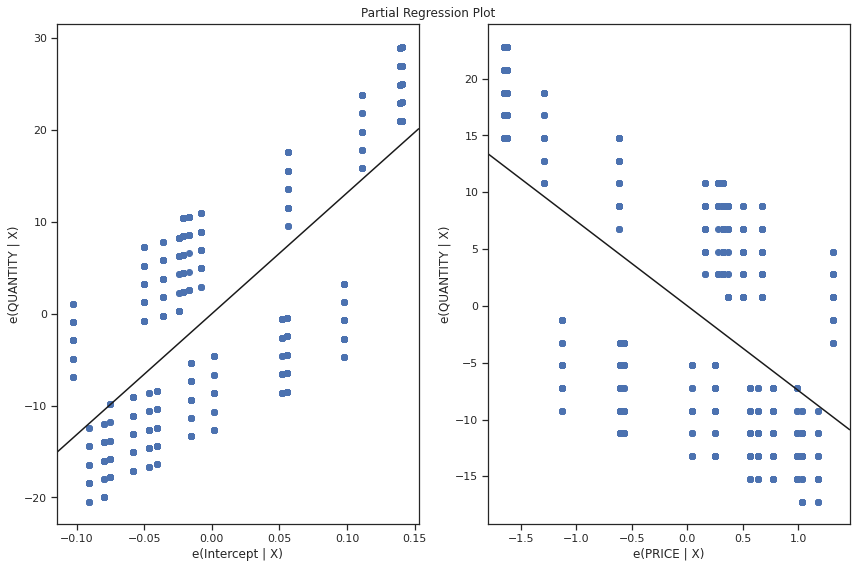

In [85]:
coke_data = bau2_data[bau2_data['ITEM_NAME'] == "COKE"]
create_model_and_find_elasticity(coke_data)

## model: coke_2053 and price elasticity

Price elasticity of the product: -6.164156666230162
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1784.
Date:                Mon, 21 Nov 2022   Prob (F-statistic):          3.72e-152
Time:                        11:19:39   Log-Likelihood:                -1035.7
No. Observations:                 416   AIC:                             2075.
Df Residuals:                     414   BIC:                             2083.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------


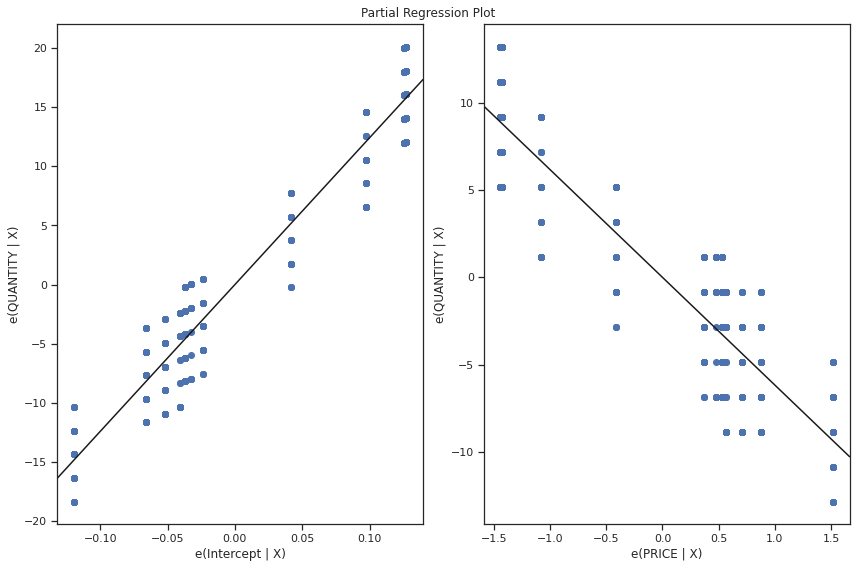

In [86]:
coke_data_2053 = bau2_data[(bau2_data['ITEM_NAME'] == "COKE") & (bau2_data['SELL_ID'] == 2053)]
elasticities['coke_2053'], model_coke_2053 = create_model_and_find_elasticity(coke_data_2053)

## model: coke_2051 and price elasticity

Price elasticity of the product: -3.618990615456309
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.466
Method:                 Least Squares   F-statistic:                     363.3
Date:                Mon, 21 Nov 2022   Prob (F-statistic):           1.34e-58
Time:                        11:19:39   Log-Likelihood:                -1021.5
No. Observations:                 416   AIC:                             2047.
Df Residuals:                     414   BIC:                             2055.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------


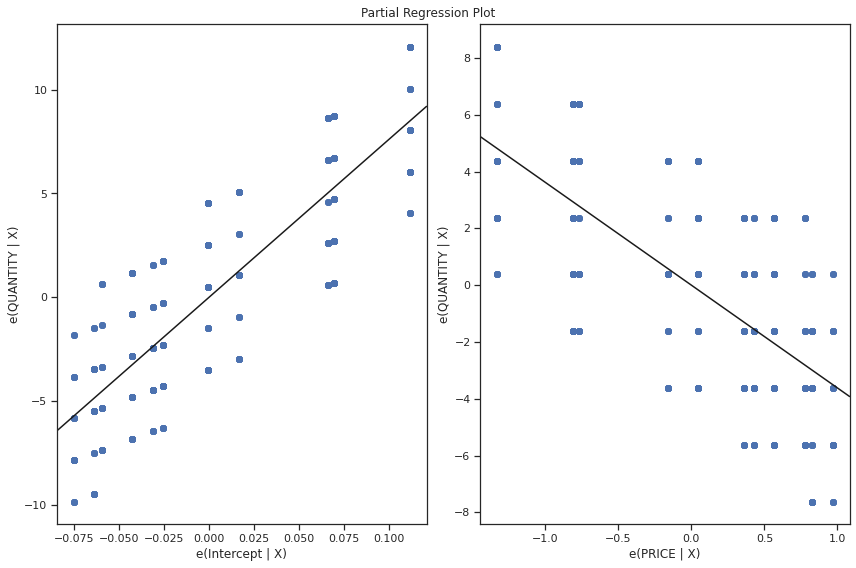

In [87]:
coke_data_2051 = bau2_data[(bau2_data['ITEM_NAME'] == "COKE") & (bau2_data['SELL_ID'] == 2051)]
elasticities['coke_2051'], model_coke_2051 = create_model_and_find_elasticity(coke_data_2051)

## model: lemonade_2052 and price elasticity

Price elasticity of the product: -2.8567029845599605
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                     316.5
Date:                Mon, 21 Nov 2022   Prob (F-statistic):           5.32e-53
Time:                        11:19:40   Log-Likelihood:                -1014.7
No. Observations:                 416   AIC:                             2033.
Df Residuals:                     414   BIC:                             2041.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

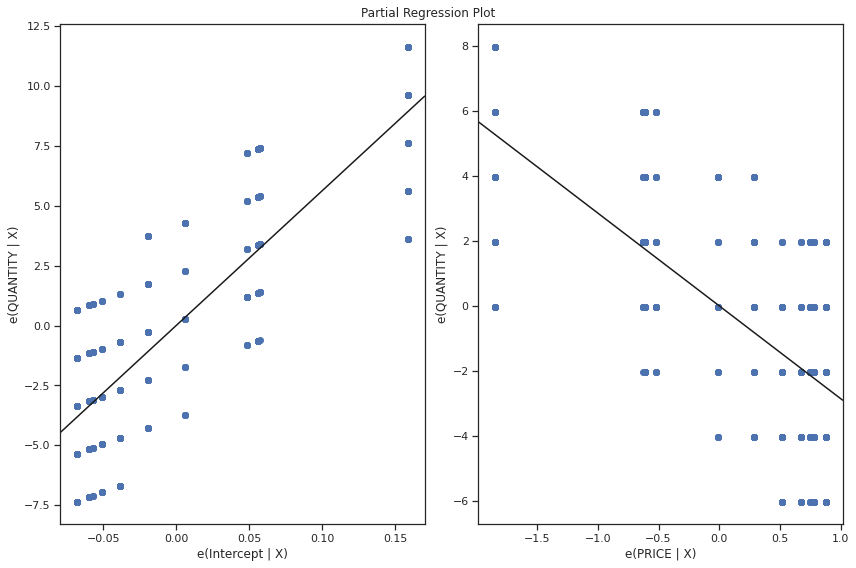

In [88]:
lemonade_data_2052 = bau2_data[(bau2_data['ITEM_NAME'] == "LEMONADE") & (bau2_data['SELL_ID'] == 2052)]
elasticities['lemonade_2052'], model_lemonade_2052 = create_model_and_find_elasticity(lemonade_data_2052)

## model: coffee_2053 and price elasticity

Price elasticity of the product: -6.164156666230162
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1784.
Date:                Mon, 21 Nov 2022   Prob (F-statistic):          3.72e-152
Time:                        11:19:40   Log-Likelihood:                -1035.7
No. Observations:                 416   AIC:                             2075.
Df Residuals:                     414   BIC:                             2083.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------


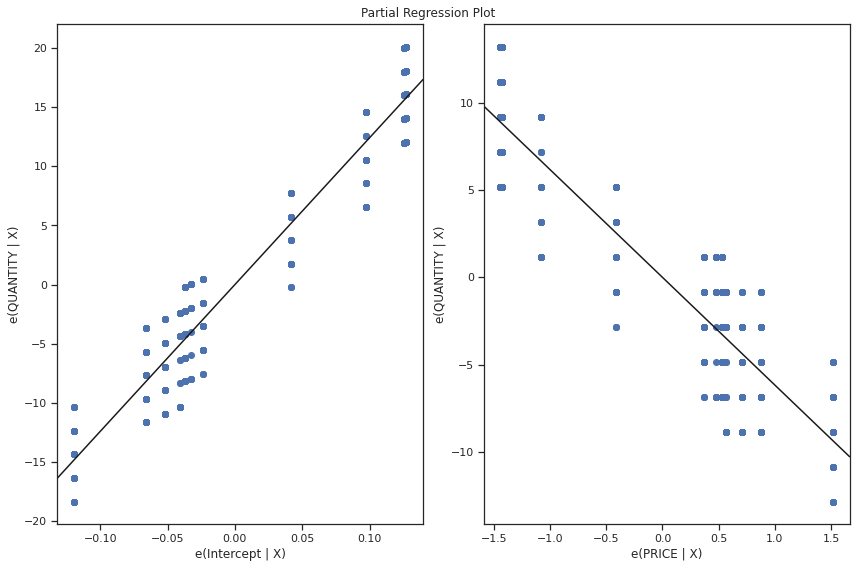

In [89]:
coffee_data_2053 = bau2_data[(bau2_data['ITEM_NAME'] == "COFFEE") & (bau2_data['SELL_ID'] == 2053)]
elasticities['coffee_2053'], model_coffee_2053 = create_model_and_find_elasticity(coffee_data_2053)

## List in the table the items and their price elasticities

In [90]:
# check the elastcities
elasticities

{'burger_1070': -8.658581488470567,
 'burger_2051': -3.618990615456309,
 'burger_2052': -2.8567029845599605,
 'burger_2053': -6.164156666230162,
 'coke_2053': -6.164156666230162,
 'coke_2051': -3.618990615456309,
 'lemonade_2052': -2.8567029845599605,
 'coffee_2053': -6.164156666230162}

# Find optimal price for maximum profit

In [91]:
# minimum value
coke_data.PRICE.min()
coke_data.PRICE.max()

10.45

13.41

# Define Test model

In [92]:
buying_price_coke= 9
start_price =9.5
end_price= 20

In [93]:
test = pd.DataFrame(columns=["PRICE", "QUANTITY"])

In [94]:
test['PRICE']=np.arange(start_price, end_price, 0.1)

In [95]:
test['QUANTITY']=model_coke_2051.predict(test['PRICE'])

In [96]:
test

,PRICE,QUANTITY
0,9.5,41.759021
1,9.6,41.397122
2,9.7,41.035223
3,9.8,40.673324
4,9.9,40.311424
5,10.0,39.949525
6,10.1,39.587626
7,10.2,39.225727
8,10.3,38.863828
9,10.4,38.501929


In [97]:
test['PROFIT'] = (test["PRICE"] - buying_price_coke) * test["QUANTITY"]
test

,PRICE,QUANTITY,PROFIT
0,9.5,41.759021,20.879510
1,9.6,41.397122,24.838273
2,9.7,41.035223,28.724656
3,9.8,40.673324,32.538659
4,9.9,40.311424,36.280282
5,10.0,39.949525,39.949525
6,10.1,39.587626,43.546389
7,10.2,39.225727,47.070873
8,10.3,38.863828,50.522977
9,10.4,38.501929,53.902701


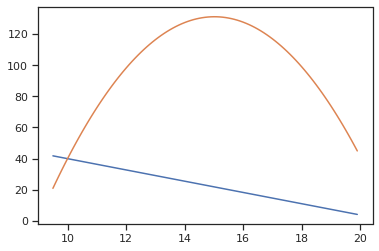

In [98]:
# plot the test 
plt.plot(test['PRICE'],test['QUANTITY'])
plt.plot(test['PRICE'],test['PROFIT'])
plt.show()

In [99]:
ind = np.where(test['PROFIT'] == test['PROFIT'].max())[0][0]

In [100]:
test.loc[[ind]]

,PRICE,QUANTITY,PROFIT
55,15.0,21.854572,131.127434


## define a function for finding the optimal price

In [101]:
# define a function for finding the optimal price
def find_optimal_price(data, model, buying_price):
    start_price = data.PRICE.min() - 1              # start price
    end_price = data.PRICE.min() + 10               # end price
    test = pd.DataFrame(columns = ["PRICE", "QUANTITY"])  # choose required columns
    test['PRICE'] = np.arange(start_price, end_price,0.01)
    test['QUANTITY'] = model.predict(test['PRICE'])         # make predictions
    test['PROFIT'] = (test["PRICE"] - buying_price) * test["QUANTITY"]
    plt.plot(test['PRICE'],test['QUANTITY'])       # plot the results 
    plt.plot(test['PRICE'],test['PROFIT']) 
    plt.show()
    ind = np.where(test['PROFIT'] == test['PROFIT'].max())[0][0]
    values_at_max_profit = test.iloc[[ind]]
    return values_at_max_profit

## Calculate the optimal price for all and list in table

In [102]:
optimal_price = {}
buying_price = 9

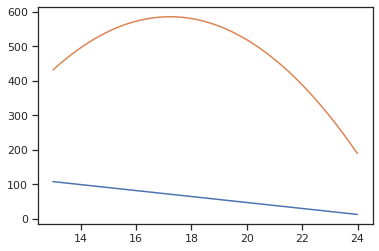

{'burger_1070':      PRICE   QUANTITY      PROFIT
 422  17.22  71.259194  585.750572}

In [103]:
optimal_price['burger_1070'] = find_optimal_price(burger_1070, model_burger_1070, buying_price)
optimal_price

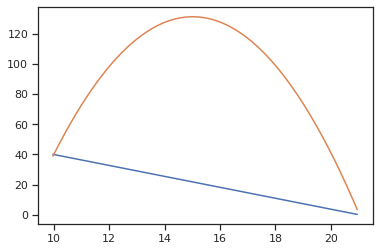

{'burger_1070':      PRICE   QUANTITY      PROFIT
 422  17.22  71.259194  585.750572,
 'burger_2051':      PRICE   QUANTITY      PROFIT
 505  15.02  21.782193  131.128799}

In [104]:
optimal_price['burger_2051'] = find_optimal_price(burger2051_data, model_burger_2051, buying_price)
optimal_price

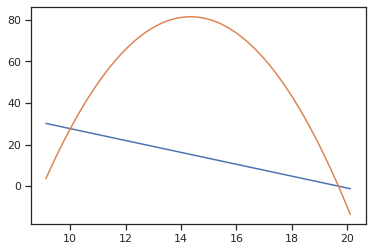

In [105]:
optimal_price['burger_2052'] = find_optimal_price(burger2052_data, model_burger_2052, buying_price)

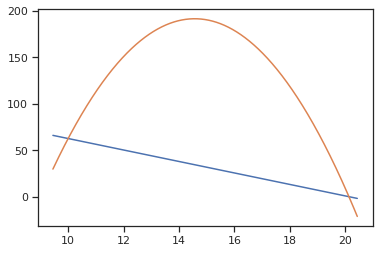

In [106]:
optimal_price['burger_2053'] = find_optimal_price(burger2053_data, model_burger_2053, buying_price)

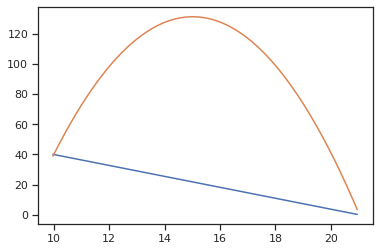

In [107]:
optimal_price['coke_2051'] = find_optimal_price(coke_data_2051, model_coke_2051, buying_price)

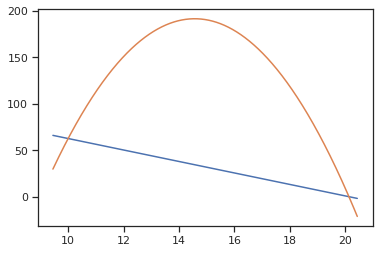

In [108]:
optimal_price['coke_2053'] = find_optimal_price(coke_data_2053, model_coke_2053, buying_price)

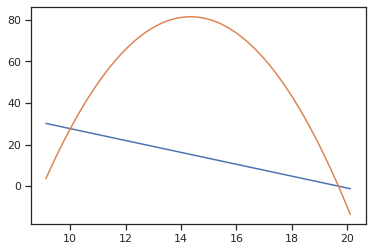

In [109]:
optimal_price['lemonade_2052'] = find_optimal_price(lemonade_data_2052, model_lemonade_2052, buying_price)

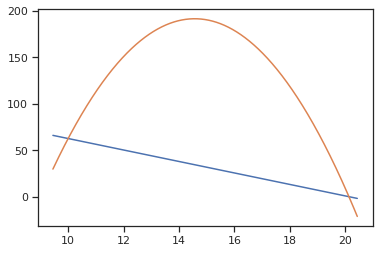

In [110]:
optimal_price['coffee_2053'] = find_optimal_price(coffee_data_2053, model_coffee_2053, buying_price)

In [111]:
optimal_price

{'burger_1070':      PRICE   QUANTITY      PROFIT
 422  17.22  71.259194  585.750572,
 'burger_2051':      PRICE   QUANTITY      PROFIT
 505  15.02  21.782193  131.128799,
 'burger_2052':      PRICE   QUANTITY     PROFIT
 522  14.34  15.259215  81.484211,
 'burger_2053':      PRICE   QUANTITY      PROFIT
 512  14.57  34.329951  191.217825,
 'coke_2051':      PRICE   QUANTITY      PROFIT
 505  15.02  21.782193  131.128799,
 'coke_2053':      PRICE   QUANTITY      PROFIT
 512  14.57  34.329951  191.217825,
 'lemonade_2052':      PRICE   QUANTITY     PROFIT
 522  14.34  15.259215  81.484211,
 'coffee_2053':      PRICE   QUANTITY      PROFIT
 512  14.57  34.329951  191.217825}

In [112]:
coke_data_2051.PRICE.describe()

count    416.000000
mean      12.301562
std        0.730620
min       10.970000
25%       11.530000
50%       12.350000
75%       12.870000
max       13.270000
Name: PRICE, dtype: float64

# Conclusion
This is the price the cafe should set on it's item to earn maximum profit based on it's previous sales data. It is important to note that this is on a normal day. On 'other' days such as a holiday, or an event taking place have a different impact on customer buying behaviours and pattern. Usually an increase in consumption is seen on such days. These must be treated separately. Similarly, it is important to remove any external effects other than price that will affect the purchase behaviours of customers including the datapoints when the item was on discount.

Once, the new prices are put up, it is important to continuously monitor the sales and profit. If this method of pricing is a part of a rpoduct, a dashboard can be created for the purpose of monitoring these items and calculating the lift in the profit.
